<a href="https://colab.research.google.com/github/anjalikokare/MLP-lectures/blob/main/week_mlp_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
from google.colab import files
data = files.upload()

Saving DataPreprocessingGraded_dataset.csv to DataPreprocessingGraded_dataset (11).csv


In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer

In [297]:
df = pd.read_csv('DataPreprocessingGraded_dataset.csv')


In [298]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO



Q1.How many samples are there in this dataset?


In [299]:
print(df.shape[0])

748


Q2 . How many input features are there in this dataset?


In [300]:
print(df.shape[1]-1) # input features mtlab jinse hame prediction krn ahai aur output me Tareget colm milenga

5


Q3. What type of problem is this?
[Hint: look at the target variable.]

In [301]:
# 'Classification Problem' --> yes\no type
y = df.Target.unique()
print(y)

['YES' 'NO']


Q4. Which of the features has least variance?
  [Hint: Ignore/remove missing values if any. Are there any categorical features?]

In [302]:
a = df.dropna()
print(df.dtypes)
varience = a.var(numeric_only = True)
print(varience.idxmin())


V1         object
V2         object
V3        float64
V4        float64
V5         object
Target     object
dtype: object
V4


Q5. Which of the following features has least number of outliers?
   [Hint: Which visualization marks outliers? Ignore/remove missing values if any]

Index(['V3', 'V4'], dtype='object')


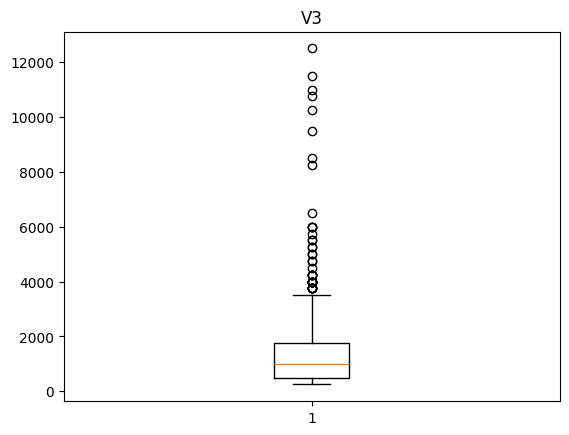

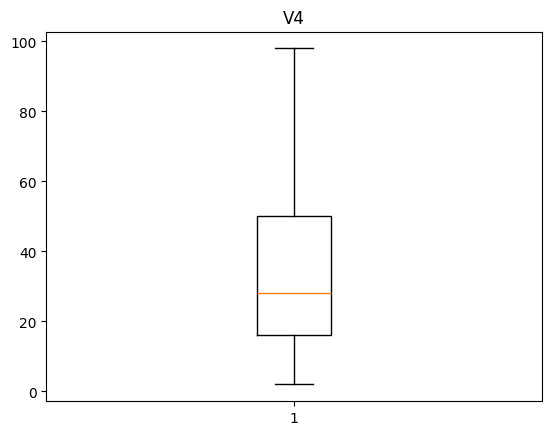

In [303]:
numeric = a.select_dtypes(include=['int64', 'float64']).columns
print(numeric)
for col in numeric:
  plt.figure()
  plt.boxplot(a[col])
  plt.title(col)
  plt.show()

Q6. Which of the following is true about target variable?
* It has higher 'YES' entries than 'NO' entries.
* It has higher 'NO' entries than 'YES' entries.
* It has same number of entries of 'YES' and 'NO'

In [304]:
outlier_count = {}
for col in numeric:
    Q1 = a[col].quantile(0.25)
    Q3 = a[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (a[col] < Q1 - 1.5*IQR) | (a[col] > Q3 + 1.5*IQR)
    outlier_count[col] = outliers.sum()
print(outlier_count)

{'V3': np.int64(45), 'V4': np.int64(0)}


In [305]:
a = (df['Target'] == 'YES').sum()
print(a)
b = (df['Target'] == 'NO').sum()
print(b)

178
570


Q7. How many features have missing values in the dataset?
  [Hint: missing values are marked by '?']


In [306]:
a = df.columns[(df == '?').any()]
print(a)

Index(['V1', 'V2'], dtype='object')


Q8. What is total number of missing values in the dataset?


In [307]:
df.replace('?',np.nan,inplace = True)
a =df.isna().sum().sum()
print(a)


10


Q9. What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?


In [308]:
a = df[['V1']]
si = SimpleImputer(strategy = 'median')
a[['V1']] = si.fit_transform(a[['V1']])

avg_v1 = a['V1'].mean()
print(avg_v1)

9.552139037433156


/tmp/ipython-input-3160753696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[['V1']] = si.fit_transform(a[['V1']])



Q10. What is average of first column after applyting KNNImputer(n_neighbors = 3)?

In [309]:
a = df[['V1']]
ki = KNNImputer(n_neighbors=3)
a['V1'] = ki.fit_transform(a)


avg_v1 = a['V1'].mean()
print(avg_v1)

9.562584118438762


/tmp/ipython-input-189572291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['V1'] = ki.fit_transform(a)


Q11. What is average of second feature (i.e. 'V2') after applyting SimpleImputer(strategy = 'mean')?

In [310]:
b = df[['V2']]
si = SimpleImputer(strategy = 'mean')
b['V2'] = si.fit_transform(b)

avg_v2 = b['V2'].mean()
print(avg_v2)

5.464333781965007


/tmp/ipython-input-2221157967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['V2'] = si.fit_transform(b)
